In [127]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

In [128]:
PVRes.capacity = 0.0
base_ebalance = annual_energy_balance(residential, PVRes, print_output=false);
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);

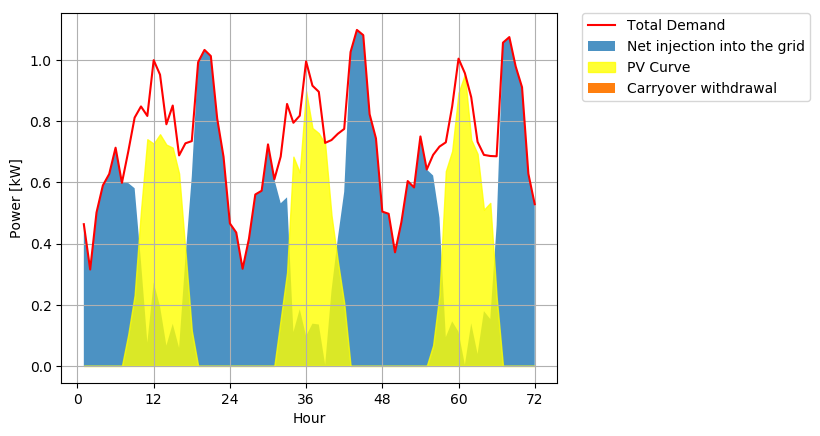

In [129]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [130]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.84 204.15 1.75 343.44 100.03 1.75 1.75 341.69 0.0 1.19 1.19
2 545.41 138.38 0.0 407.03 166.09 0.0 0.0 407.03 0.0 1.31 1.31
3 553.57 144.07 0.01 409.51 236.68 0.01 0.01 409.5 0.0 1.19 1.19
4 540.57 167.89 0.07 372.75 318.95 0.07 0.07 372.68 0.0 1.21 1.21
5 553.89 185.9 0.94 368.94 409.96 0.94 0.94 367.99 0.0 1.21 1.21
6 555.82 168.85 0.14 387.11 491.75 0.14 0.14 386.97 0.0 1.24 1.24
7 538.6 171.36 0.0 367.24 575.58 0.0 0.0 367.24 0.0 1.16 1.16
8 547.16 168.31 1.59 380.44 658.05 1.59 1.59 378.85 0.0 1.19 1.19
9 536.94 178.77 0.81 358.98 744.06 0.81 0.81 358.17 0.0 1.19 1.19
10 559.76 184.74 0.08 375.1 833.77 0.08 0.08 375.03 0.0 1.21 1.21
11 557.76 145.73 0.0 412.03 905.1 0.0 0.0 412.03 0.0 1.24 1.24
12 558.25 186.2 0.43 372.48 996.34 0.43 0.43 372.05 0.0 1.21 1.21


### Billings case residential 1

In [131]:
bills_residential = Dict();  base_bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
    base_bills_residential[m] = monthly_bill(base_ebalance[m], residential, print_output=false)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
45862.1 36.75 0.0 53874.41  | 78001.33 24126.92
52405.18 0.0 0.0 61563.63  | 77950.66 16387.03
52652.54 0.12 0.0 61856.29  | 78916.91 17060.62
48965.11 1.55 0.0 57497.6  | 77377.26 19879.66
48495.63 19.86 0.0 56966.49  | 78954.65 21988.15
50396.1 3.03 0.0 59191.76  | 79183.03 19991.27
48420.01 0.0 0.0 56850.96  | 77143.6 20292.64
49582.68 33.45 0.0 58269.85  | 78157.75 19887.9
47512.55 17.02 0.0 55800.21  | 76947.47 21147.26
49200.01 1.59 0.0 57775.43  | 79650.26 21874.83
52905.99 0.0 0.0 62155.86  | 79412.85 17256.99
48901.89 8.98 0.0 57432.62  | 79471.18 22038.56


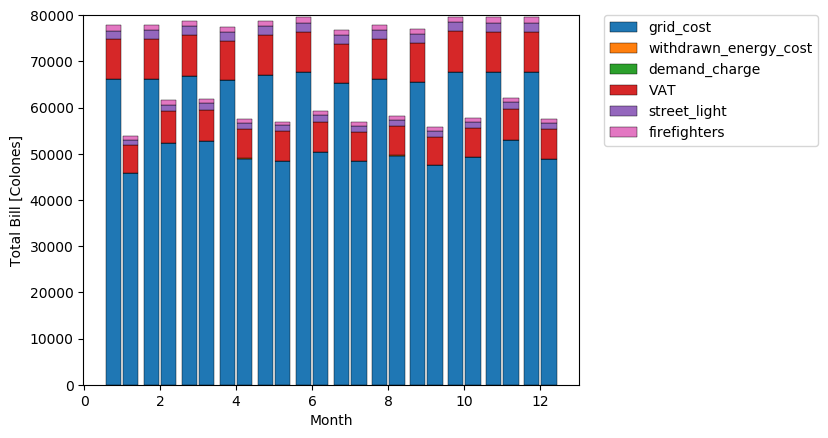

In [132]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

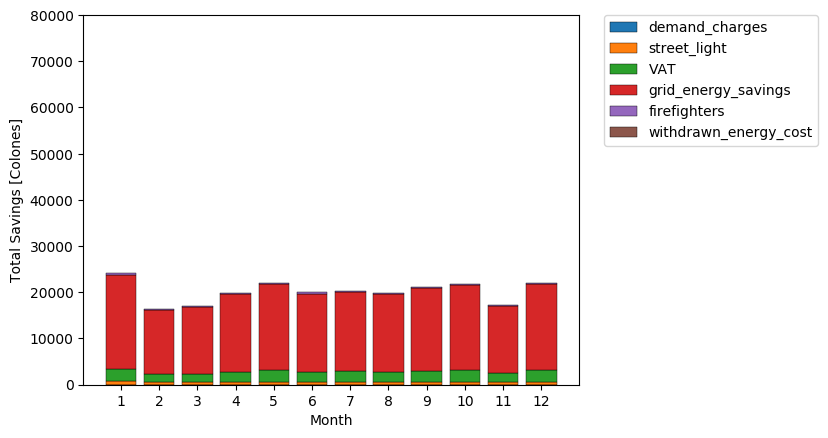

In [133]:
plot_savings(bills_residential);

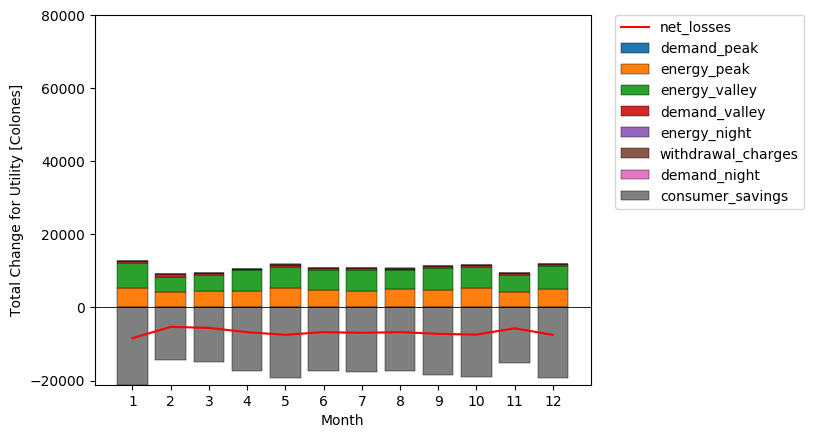

In [134]:
plot_utility_change(bills_residential);

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [135]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

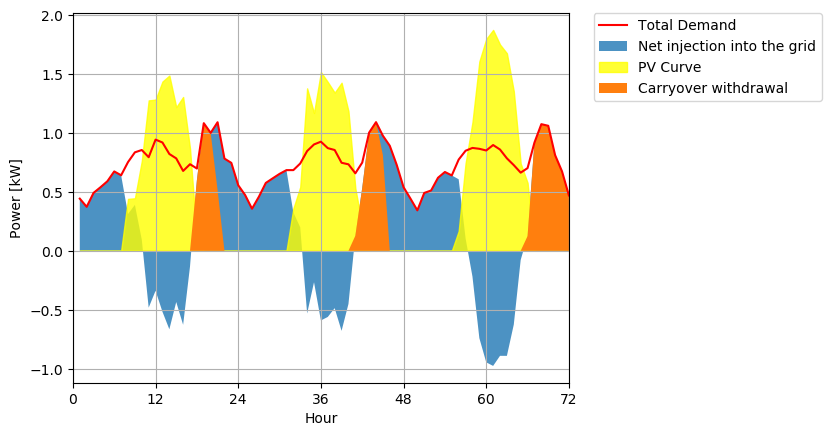

In [136]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [137]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.69 356.85 114.01 302.86 174.85 114.01 114.01 188.85 0.0 1.18 1.18
2 547.61 255.87 45.29 337.03 186.22 45.29 45.29 291.74 0.0 1.29 1.29
3 552.5 281.15 68.95 340.3 278.69 68.95 68.95 271.35 0.0 1.19 1.19
4 539.52 317.22 92.79 315.09 365.17 92.79 92.79 222.3 0.0 1.19 1.19
5 553.31 354.4 100.24 299.15 446.04 100.24 100.24 198.91 0.0 1.2 1.2
6 555.09 332.57 92.73 315.25 508.76 92.73 92.73 222.51 0.0 1.21 1.21
7 537.38 334.23 100.79 303.93 579.8 100.79 100.79 203.15 0.0 1.17 1.17
8 546.17 346.13 114.19 314.23 648.62 114.19 114.19 200.04 0.0 1.19 1.19
9 536.84 327.3 106.33 315.87 694.8 106.33 106.33 209.54 0.0 1.21 1.21
10 558.15 338.96 95.07 314.25 754.56 95.07 95.07 219.18 0.0 1.21 1.21
11 558.41 346.62 98.93 310.72 829.34 98.93 98.93 211.79 0.0 1.25 1.25
12 559.55 331.24 95.23 323.54 892.72 95.23 95.23 228.31 0.0 1.21 1.21


### Billings case residential 2

In [138]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
11922.02 2397.72 0.0 17494.95  | 77984.17 60489.22
21512.59 952.49 0.0 26961.65  | 78210.69 51249.04
19537.9 1450.03 0.0 25278.12  | 78790.09 53511.97
14786.55 1951.38 0.0 20312.75  | 77253.09 56940.34
12557.4 2108.02 0.0 17878.6  | 78886.22 61007.63
14807.03 1950.14 0.0 20335.36  | 79096.22 58760.86
12930.81 2119.57 0.0 18337.12  | 76999.63 58662.51
12630.02 2401.48 0.0 18351.62  | 78040.73 59689.11
13550.12 2236.1 0.0 19223.39  | 76935.24 57711.86
14484.22 1999.24 0.0 20017.78  | 79458.66 59440.88
13767.97 2080.58 0.0 19276.85  | 79490.26 60213.41
15368.42 2002.62 0.0 21068.89  | 79624.6 58555.71


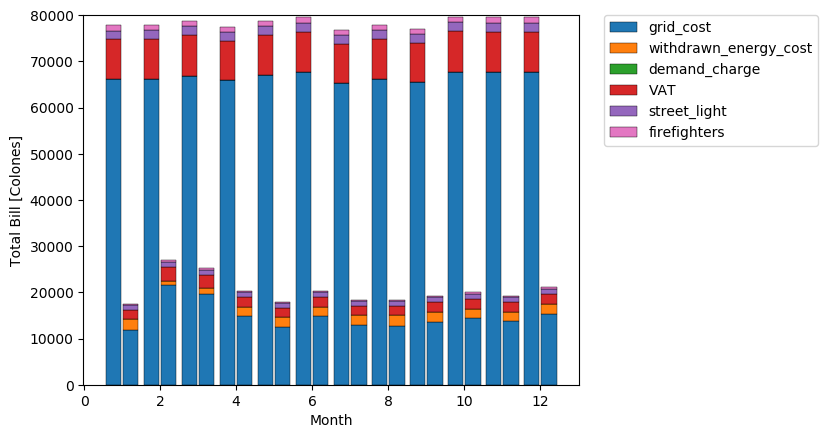

In [139]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

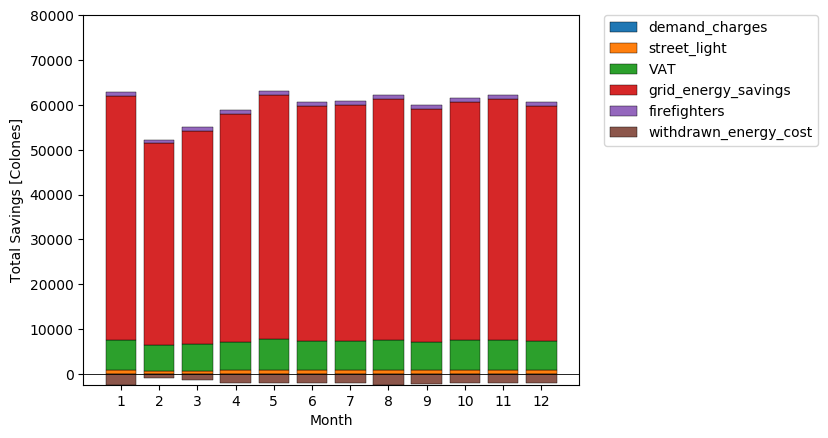

In [140]:
plot_savings(bills_residential);

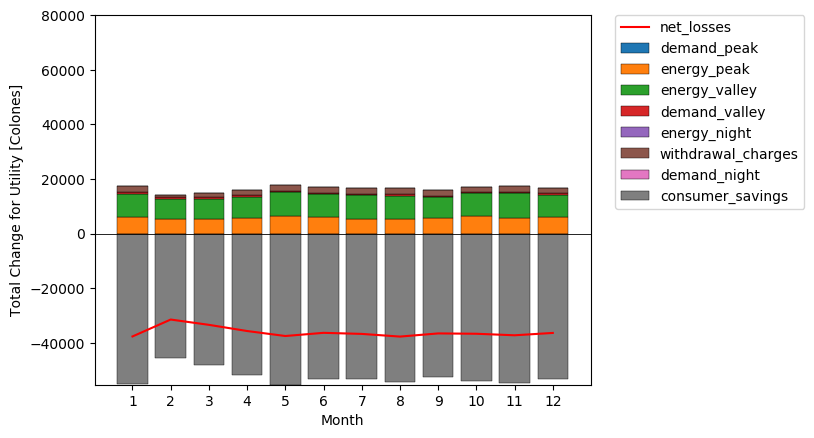

In [141]:
plot_utility_change(bills_residential);

## Residential Case 3: Large PV System that generates multi-day carry over

In [142]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

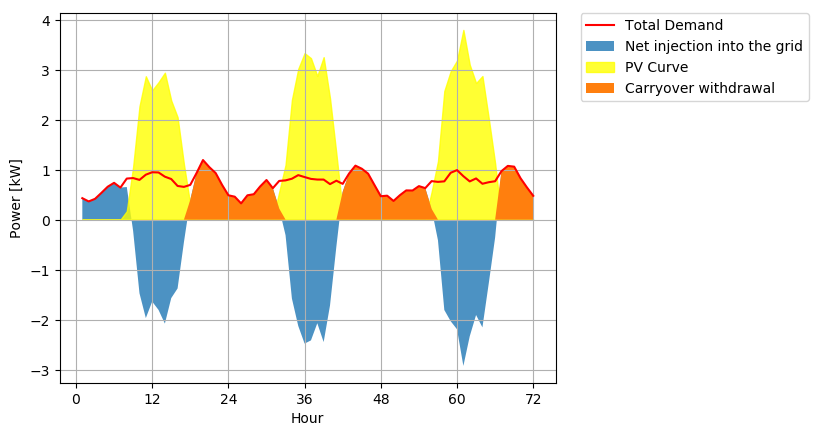

In [143]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [144]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.58 804.02 536.59 279.15 393.97 393.97 279.15 0.0 114.82 1.18 1.18
2 545.92 509.5 275.45 311.87 364.47 364.47 311.87 0.0 52.6 1.3 1.3
3 554.93 624.09 384.57 315.42 358.41 358.41 315.42 0.0 42.99 1.2 1.2
4 540.77 716.56 455.11 279.32 394.11 394.11 279.32 0.0 114.79 1.21 1.21
5 554.77 700.57 430.22 284.42 458.07 458.07 284.42 0.0 173.65 1.21 1.21
6 559.05 695.4 432.49 296.14 514.39 514.39 296.14 0.0 218.25 1.23 1.23
7 539.19 714.71 451.47 275.96 568.46 568.46 275.96 0.0 292.5 1.16 1.16
8 547.52 731.97 486.83 302.38 651.16 651.16 302.38 0.0 348.78 1.19 1.19
9 539.49 689.73 426.14 275.9 686.75 686.75 275.9 0.0 410.85 1.2 1.2
10 557.92 720.13 480.93 318.71 763.72 763.72 318.71 0.0 445.01 1.21 1.21
11 558.46 717.34 455.65 296.76 796.51 796.51 296.76 0.0 499.75 1.25 1.25
12 559.94 745.25 484.74 299.43 864.92 864.92 299.43 0.0 565.

### Billings case residential 3

In [145]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
0.0 5870.51 0.0 6953.06  | 78088.51 71135.45
0.0 6558.62 0.0 8620.68  | 78010.94 69390.26
0.0 6633.18 0.0 8718.69  | 79077.71 70359.02
0.0 5874.12 0.0 6957.34  | 77401.07 70443.74
0.0 5981.32 0.0 7861.87  | 79058.74 71196.87
0.0 6227.86 0.0 8185.92  | 79565.81 71379.89
0.0 5803.36 0.0 6873.53  | 77214.31 70340.78
0.0 6359.07 0.0 8358.39  | 78200.48 69842.09
0.0 5802.16 0.0 6872.11  | 77249.62 70377.52
0.0 6702.5 0.0 8809.79  | 79431.38 70621.59
0.0 6240.77 0.0 8202.89  | 79495.25 71292.36
0.0 6297.02 0.0 8276.83  | 79671.21 71394.38


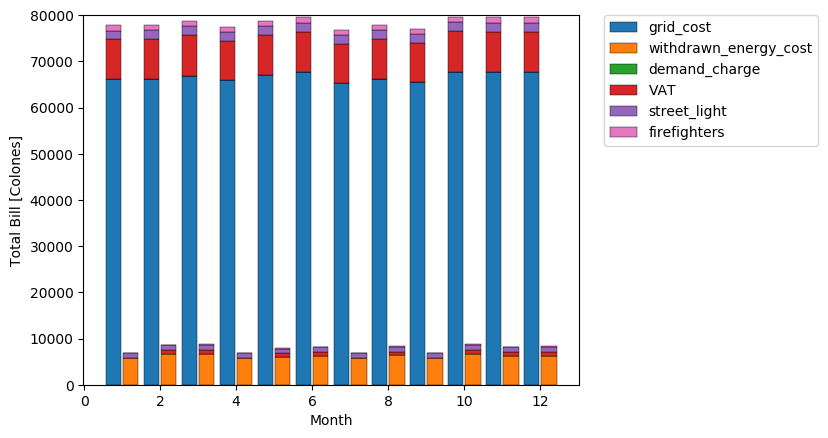

In [146]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

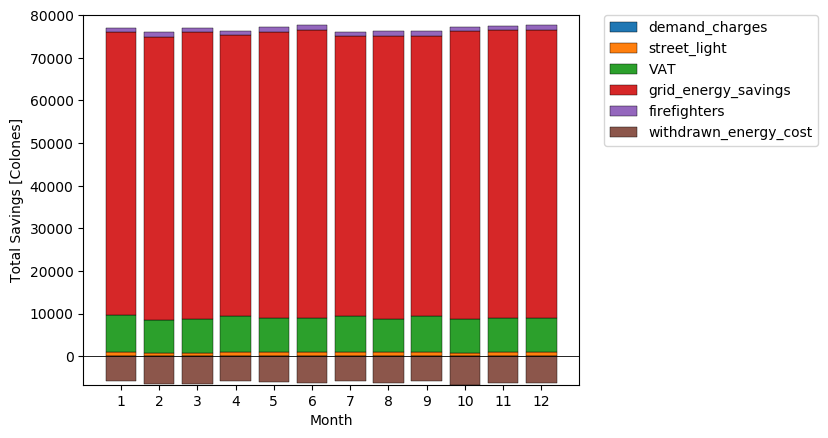

In [147]:
plot_savings(bills_residential);

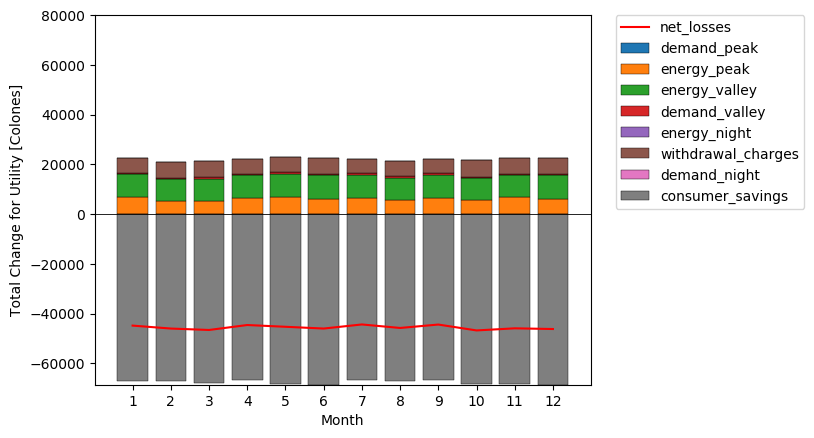

In [148]:
plot_utility_change(bills_residential);

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

In [149]:
PVComInd.capacity = 0.0
base_ebalance = annual_energy_balance(commercial, PVComInd, print_output=false);
PVComInd.capacity = 10.0
ts=simulate(commercial, PVComInd, 3);

In [150]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 5014.26 1770.01 0.0 3244.25 867.3 0.0 0.0 3244.25 0.0 14.9 10.51
2 5098.06 1357.43 0.0 3740.63 1532.44 0.0 0.0 3740.63 0.0 16.87 12.57
3 4846.76 1488.12 0.0 3358.64 2261.62 0.0 0.0 3358.64 0.0 14.5 10.83
4 5037.05 1677.15 0.0 3359.9 3083.42 0.0 0.0 3359.9 0.0 15.41 10.38
5 5339.44 1709.82 0.0 3629.62 3921.24 0.0 0.0 3629.62 0.0 15.94 11.61
6 5200.94 1617.06 0.0 3583.88 4713.6 0.0 0.0 3583.88 0.0 16.01 11.45
7 4966.31 1700.05 0.0 3266.27 5546.62 0.0 0.0 3266.27 0.0 14.81 9.87
8 4997.69 1843.16 0.0 3154.52 6449.77 0.0 0.0 3154.52 0.0 14.55 9.51
9 4905.56 1676.71 0.0 3228.85 7271.36 0.0 0.0 3228.85 0.0 15.03 10.59
10 4734.95 1638.64 0.0 3096.31 8074.29 0.0 0.0 3096.31 0.0 14.11 9.3
11 4919.09 1668.34 0.0 3250.75 8891.78 0.0 0.0 3250.75 0.0 14.94 10.19
12 4860.43 1847.71 0.05 3012.77 9797.15 0.05 0.05 3012.72 0.0 14.39 9.07


In [151]:
bills_commercial = Dict()
base_bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
    base_bills_commercial[m] = monthly_bill(base_ebalance[m], commercial, print_output=false)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
208345.85 0.0 105624.74 371668.57  | 322015.89 149797.4 559005.82  | 187337.24
240223.33 0.0 126376.18 433802.56  | 327397.22 169632.32 588235.57  | 154433.01
215691.7 0.0 108883.75 384239.15  | 311258.69 145778.51 541462.3  | 157223.16
215773.0 0.0 104379.81 379168.61  | 323479.35 154909.92 566631.74  | 187463.13
233094.21 0.0 116763.51 414201.7  | 342898.92 160214.09 596063.61  | 181861.91
230156.75 0.0 115129.13 408794.96  | 334004.63 160991.07 586262.87  | 177467.91
209759.58 0.0 99252.38 366055.82  | 318936.62 148870.2 554240.08  | 188184.27
202583.45 0.0 95648.59 353293.64  | 320951.33 146233.73 553636.73  | 200343.09
207356.65 0.0 106436.7 371411.12  | 315034.81 151064.23 552067.15  | 180656.03
198844.98 0.0 93470.03 346299.52  | 304078.42 141816.14 528283.68  | 181984.16
208763.38 0.0 102459.91 368538.87  | 315904.03 15017

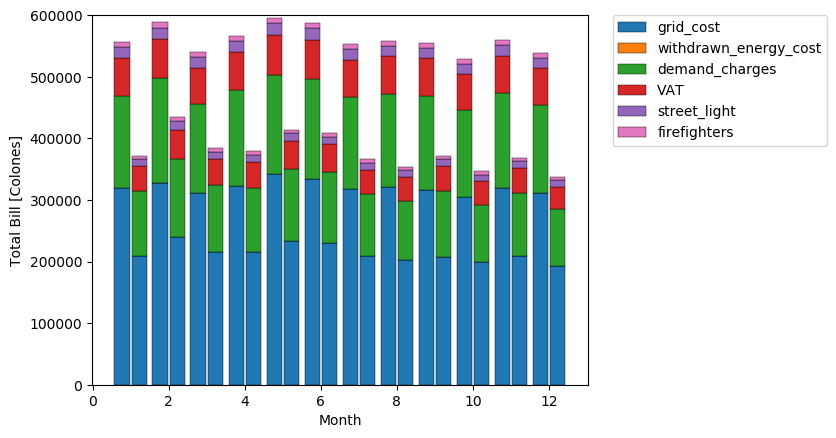

In [154]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

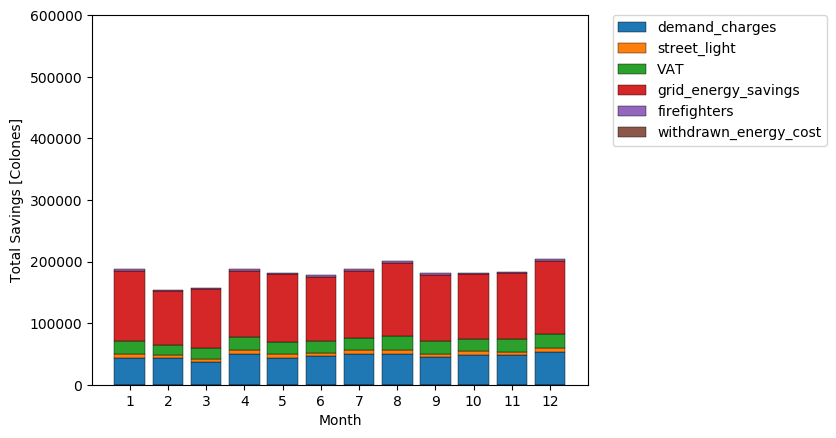

PyObject <matplotlib.lines.Line2D object at 0x14338f5c0>

In [155]:
plot_savings(bills_commercial)

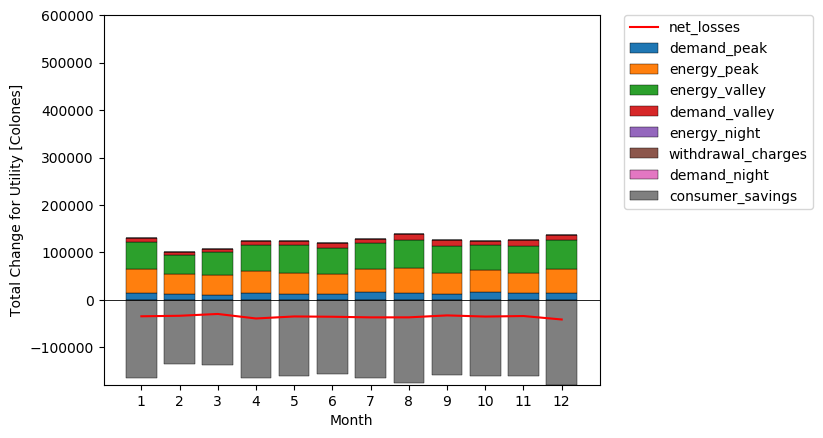

In [156]:
plot_utility_change(bills_commercial);

## Commercial case 2: medium PV system

In [157]:
PVComInd.capacity = 21.0
ts=simulate(commercial, PVComInd, 3);

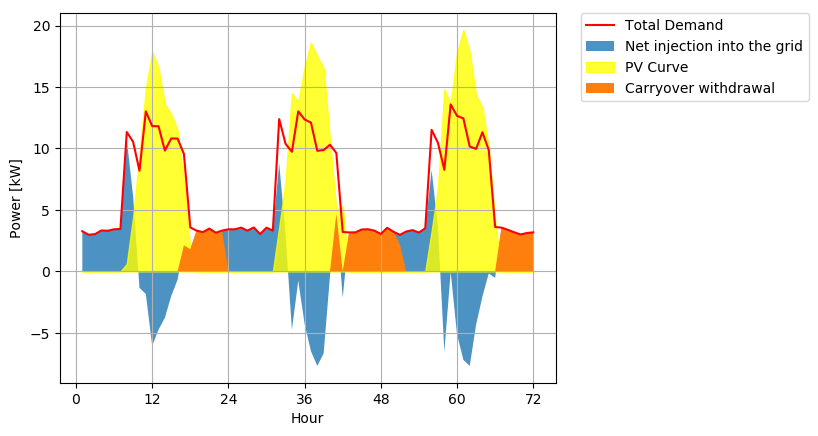

In [158]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [159]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4969.4 4042.05 829.34 1756.69 1980.6 829.34 829.34 927.36 0.0 14.71 8.35
2 5115.66 2716.0 174.0 2573.66 2482.11 174.0 174.0 2399.66 0.0 16.85 12.48
3 4857.78 2949.08 273.77 2182.46 3753.15 273.77 273.77 1908.69 0.0 14.32 10.85
4 5002.92 3321.1 374.78 2056.6 5106.73 374.78 374.78 1681.82 0.0 15.33 7.43
5 5389.4 3759.52 560.64 2190.53 6574.11 560.64 560.64 1629.89 0.0 15.94 8.76
6 5190.58 3622.63 439.07 2007.03 7788.55 439.07 439.07 1567.96 0.0 15.93 8.71
7 4977.0 3586.05 525.11 1916.05 9106.65 525.11 525.11 1390.95 0.0 14.77 9.7
8 4987.09 3743.37 556.94 1800.66 10415.8 556.94 556.94 1243.72 0.0 14.61 7.03
9 4916.18 3454.33 526.22 1988.07 11551.48 526.22 526.22 1461.85 0.0 15.14 10.75
10 4753.59 3756.14 752.76 1750.21 12865.76 752.76 752.76 997.45 0.0 13.97 6.84
11 4949.99 3381.09 416.43 1985.34 13769.73 416.43 416.43 1568.91 0.

In [160]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
98930.37 17440.93 0.0 139702.05  | 319135.09 147889.36 553353.16  | 413651.11
255995.8 3659.31 0.0 306987.8  | 328527.76 169435.82 589369.18  | 282381.38
203619.58 5757.36 0.0 247920.49  | 311966.52 144010.31 540284.22  | 292363.73
179416.07 7881.7 0.0 222142.85  | 321287.54 154132.04 563104.22  | 340961.37
173876.24 11790.25 0.0 220741.04  | 346107.48 160256.21 599969.14  | 379228.1
167269.62 9233.61 0.0 209582.12  | 333339.33 160170.78 584521.8  | 374939.68
148386.32 11042.97 0.0 189670.46  | 319623.05 148450.65 554583.84  | 364913.38
132680.44 11712.44 0.0 172011.16  | 320271.0 146855.43 553532.27  | 381521.12
155949.77 11066.45 0.0 198629.24  | 315716.78 152168.09 554153.66  | 355524.42
106407.92 15830.6 0.0 146411.95  | 305275.44 140415.18 528115.08  | 381703.13
167371.02 8757.49 0.0 209075.99  | 317888.63 153219.79 557971.4  | 348895.4
1243

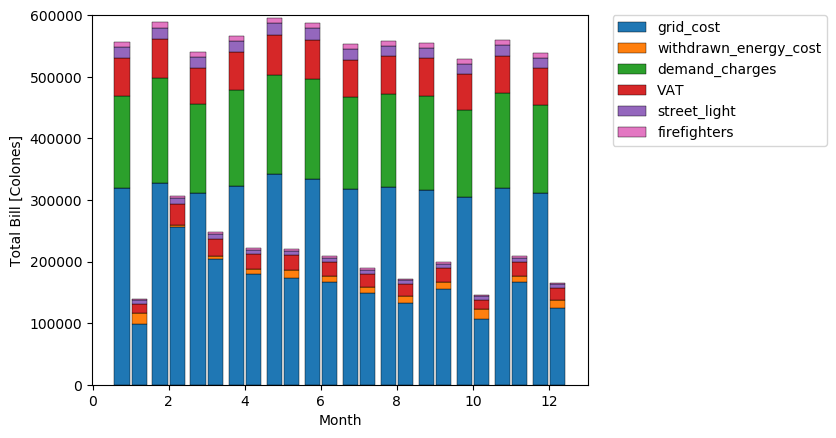

In [161]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

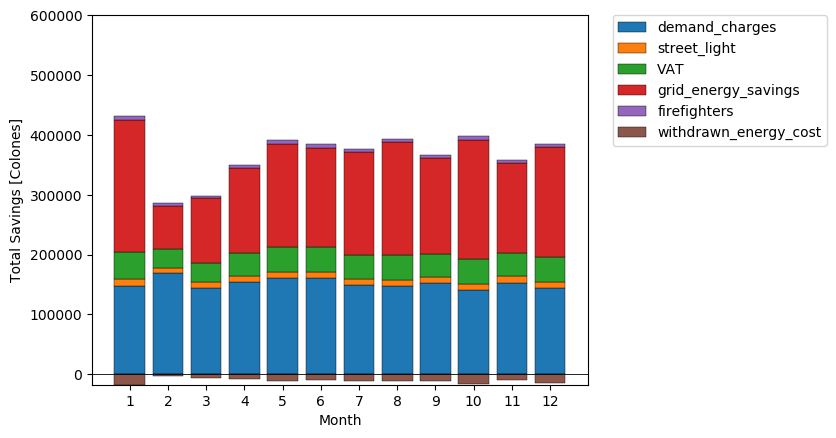

PyObject <matplotlib.lines.Line2D object at 0x140f3cbe0>

In [162]:
plot_savings(bills_commercial)

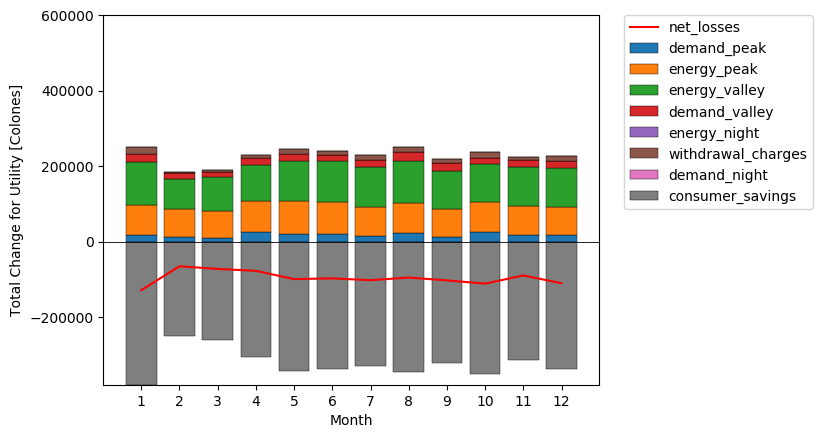

In [163]:
plot_utility_change(bills_commercial);

## Commercial case 3: Large PV system

In [164]:
PVComInd.capacity = 32.0
ts=simulate(commercial, PVComInd, 3);

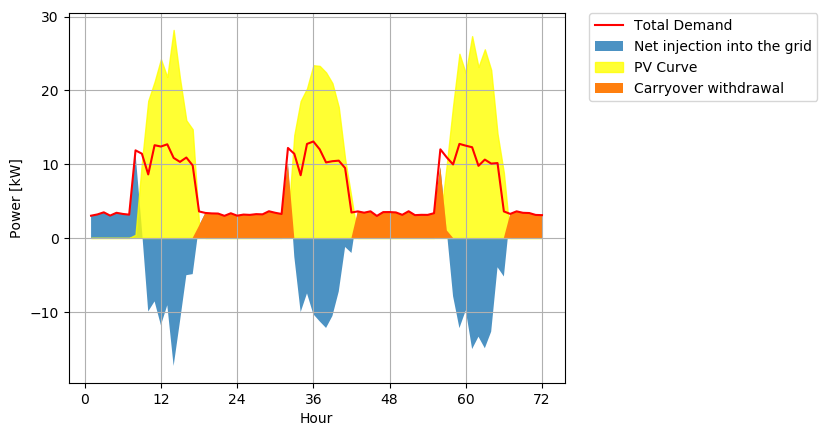

In [165]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [166]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4997.21 6096.01 2668.22 1569.42 2987.05 2668.22 1569.42 0.0 1098.8 14.89 6.32
2 5112.41 4460.88 1300.78 1952.31 3603.45 2399.58 1952.31 0.0 447.27 16.84 12.43
3 4858.64 4470.23 1477.19 1865.61 3841.55 1924.46 1865.61 0.0 58.85 14.47 10.87
4 5013.61 5466.3 2150.33 1697.63 4654.43 2209.18 1697.63 0.0 511.55 15.44 7.28
5 5362.79 5384.92 1785.42 1763.3 5595.41 2296.97 1763.3 0.0 533.68 15.97 7.39
6 5184.51 5552.0 2077.46 1709.98 6552.59 2611.13 1709.98 0.0 901.16 15.98 5.86
7 4955.09 5213.8 2088.62 1829.91 7397.38 2989.78 1829.91 0.0 1159.87 14.68 9.93
8 5014.41 5600.07 2399.06 1813.4 8311.5 3558.92 1813.4 0.0 1745.53 14.93 6.07
9 4899.02 5469.24 2255.09 1684.87 9178.03 4000.62 1684.87 0.0 2315.75 14.97 9.89
10 4754.05 5107.07 2097.33 1744.31 9995.62 4413.07 1744.31 0.0 2668.77 14.15 9.63
11 4931.83 5540.41 2289.97 1681.4 10966.12

In [167]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
0.0 33005.0 0.0 43381.92  | 320921.08 149708.07 557587.17  | 514205.26
0.0 41057.09 0.0 53965.62  | 328318.81 169272.75 588930.87  | 534965.25
0.0 39233.74 0.0 51569.0  | 312022.0 145457.75 542011.85  | 490442.85
0.0 35701.21 0.0 46925.83  | 321973.9 155210.3 565166.64  | 518240.81
0.0 37082.14 0.0 48740.92  | 344398.59 160599.0 598308.14  | 549567.21
0.0 35960.8 0.0 47267.03  | 332949.52 160610.55 584557.83  | 537290.8
0.0 38482.96 0.0 50582.17  | 318215.9 147631.64 551952.42  | 501370.25
0.0 38135.79 0.0 50125.86  | 322025.49 150142.99 559413.92  | 509288.06
0.0 35432.86 0.0 46573.11  | 314614.85 150541.37 550962.31  | 504389.2
0.0 36682.77 0.0 48216.0  | 305304.98 142268.39 530277.15  | 482061.15
0.0 35359.81 0.0 46477.08  | 316722.16 150356.48 553283.47  | 506806.38
0.0 32598.8 0.0 42848.01  | 310200.95 145213.23 539542.08  | 

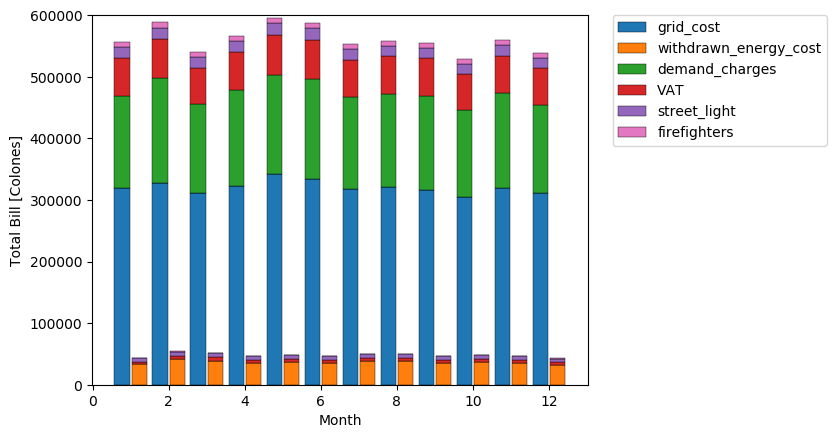

(0, 600000.0)

In [168]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"])

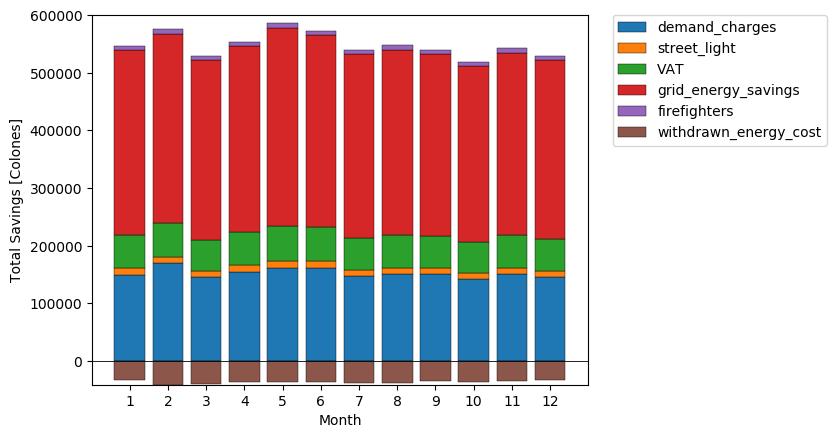

PyObject <matplotlib.lines.Line2D object at 0x1436a8208>

In [169]:
plot_savings(bills_commercial)

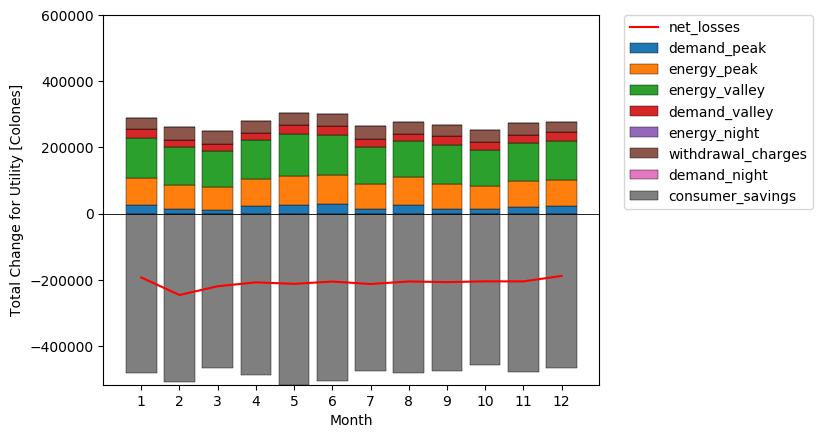

In [170]:
plot_utility_change(bills_commercial);

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

In [171]:
PVTMT.capacity = 0.0
base_ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=false);
PVTMT.capacity = 30.0
ts=simulate(mediumvoltage, PVTMT, 3);

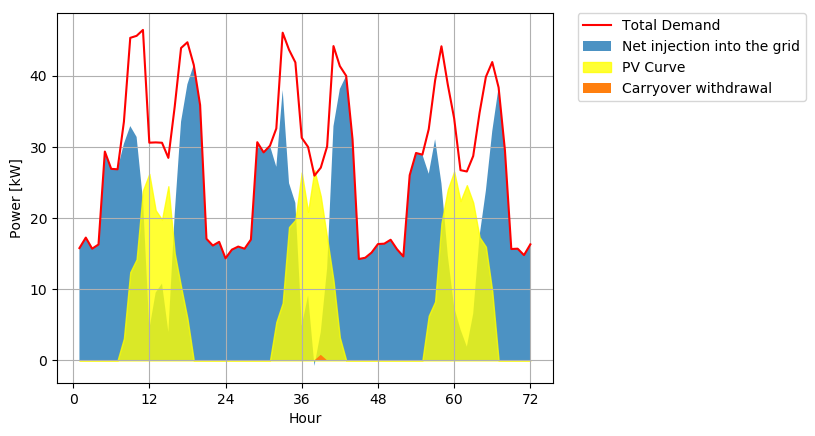

In [172]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [173]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.88 7741.03 5772.91  | 5719.35 0.0 2802.48 0.0  | 5186.83 4432.73 5772.91  | 5719.35 0.0 0.0  | 46.46 46.37 35.79  | 46.41 30.99 35.79 
2 | 6964.57 7061.86 5309.31  | 3808.57 0.0 4668.68 0.0  | 5350.27 4867.58 5309.31  | 9527.92 0.0 0.0  | 47.28 46.19 36.36  | 47.28 32.05 36.36 
3 | 7535.03 7718.27 5779.7  | 4186.85 0.0 6720.24 0.0  | 5504.5 5561.96 5779.7  | 13714.77 0.0 0.0  | 46.62 46.54 35.5  | 46.62 30.85 35.5 
4 | 7865.09 8024.01 5995.74  | 5146.75 0.0 9242.15 0.0  | 5935.16 4807.18 5995.74  | 18861.52 0.0 0.0  | 49.79 49.8 38.17  | 49.79 33.6 38.17 
5 | 7642.54 7678.33 5771.96  | 5136.57 0.0 11759.06 0.0  | 5448.64 473

In [174]:
bills_TMT= Dict(); base_bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
    base_bills_TMT[m] = monthly_bill(base_ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
282267.23 120614.66 113091.36  | 0.0  | 413476.68 210633.48 113091.36  | 442855.01 210404.66 154271.05  | 443362.76 314868.41 154271.05  | 394389.17 
412859.26 209809.78 113104.57  | 0.0  | 412859.26 209809.78 113104.57  | 444567.48 314848.38 154707.65  | 444567.48 314848.38 154707.65  | 0.0 
291161.82 132446.87 104009.41  | 0.0  | 379011.85 192153.08 104009.41  | 451151.85 217642.5 156746.93  | 451151.85 313623.48 156746.93  | 292827.05 
377405.48 194494.05 103856.76  | 0.0  | 377405.48 194494.05 103856.76  | 451977.87 318280.9 157045.59  | 451977.87 318280.9 157045.59  | 0.0 
299555.04 151340.82 113224.2

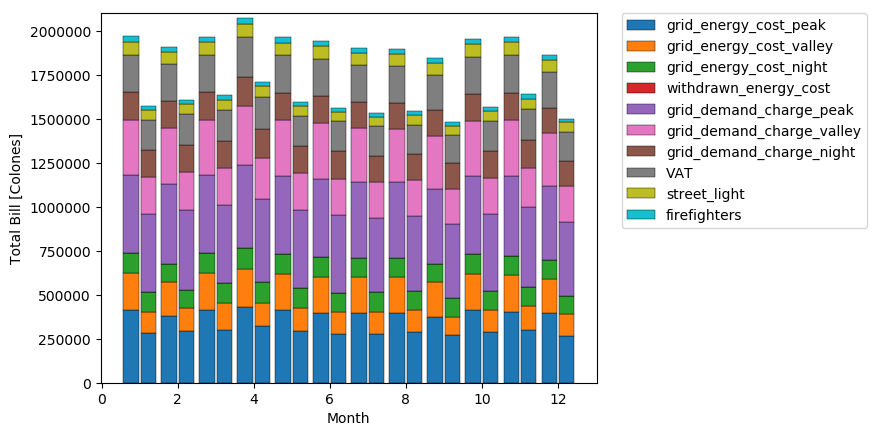

In [175]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields, 2);

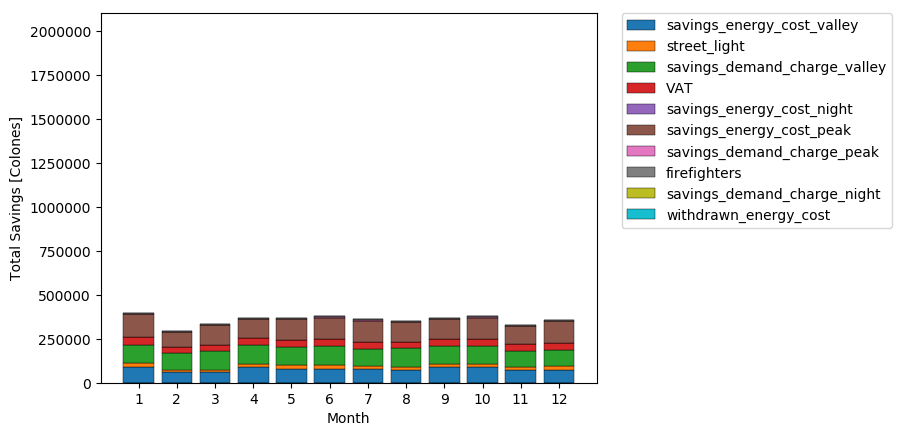

PyObject <matplotlib.lines.Line2D object at 0x141ead828>

In [176]:
plot_savings(bills_TMT, 2)

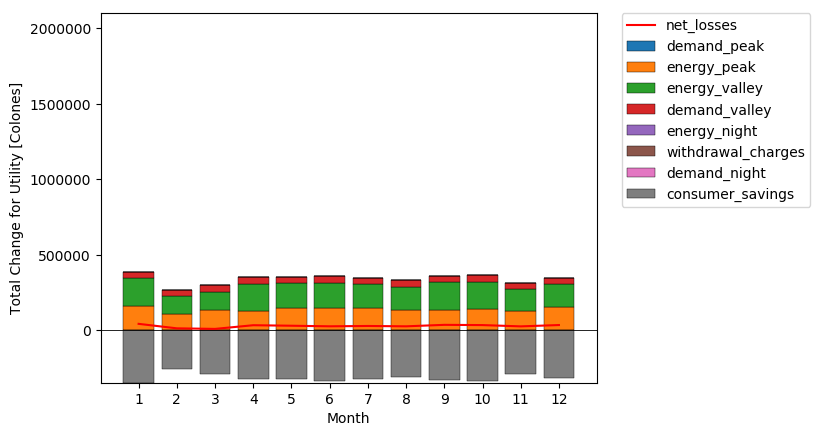

In [177]:
plot_utility_change(bills_TMT,2);

## TMT Case2: Medium PV System

In [178]:
PVTMT.capacity = 75
ts=simulate(mediumvoltage, PVTMT, 3);

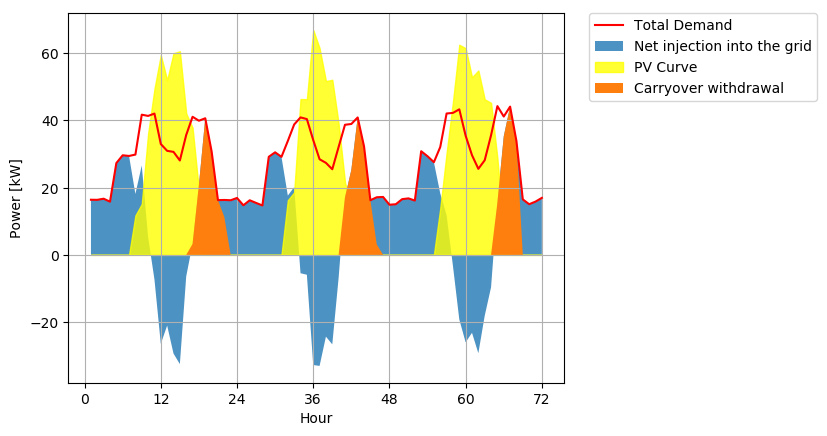

In [179]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [180]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7590.53 7738.73 5760.02  | 14784.08 4323.4 7244.2 4323.4  | 3391.26 1477.32 5760.02  | 14784.08 4323.4 0.0  | 46.49 46.47 35.53  | 46.28 30.94 35.53 
2 | 6974.17 7046.43 5297.06  | 10257.83 2246.79 7947.14 2246.79  | 3707.96 2301.6 5297.06  | 25041.92 6570.19 0.0  | 47.23 47.38 36.06  | 47.07 31.46 36.06 
3 | 7575.43 7777.99 5787.96  | 11954.69 2977.95 11558.15 2977.95  | 3937.7 2438.98 5787.96  | 36996.61 9548.14 0.0  | 46.55 46.13 35.87  | 46.35 31.02 35.87 
4 | 7827.16 8004.37 5970.48  | 12249.62 2243.3 14582.52 2243.3  | 3936.63 1888.59 5970.48  | 49246.23 11791.44 0.0  | 49.86 49.87 38.39  | 49.78 33.01 38.39 
5 | 7552.41 77

In [181]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
82912.24 0.0 112838.73  | 90921.03  | 413076.54 210570.96 112838.73  | 441624.21 210108.2 153170.62  | 443601.58 315544.33 153170.62  | 676135.82 
151702.65 26533.49 103769.36  | 47250.06  | 379534.39 191733.3 103769.36  | 449185.51 213596.07 155412.29  | 450687.23 321685.85 155412.29  | 550659.26 
124911.87 30023.57 113386.14  | 62626.25  | 412255.16 211639.14 113386.14  | 442279.95 210616.55 154621.1  | 444187.75 313202.1 154621.1  | 617681.18 
155346.81 19790.43 116961.76  | 47176.7  | 425954.01 217799.02 116961.76  | 474997.2 224167.4 165461.79  | 475817.66 338600.6 165461.79  | 650977.09 
96919.98 186

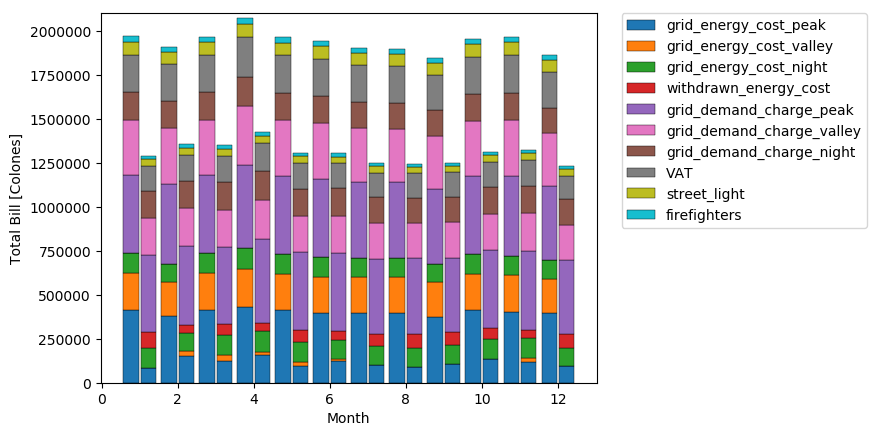

In [182]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

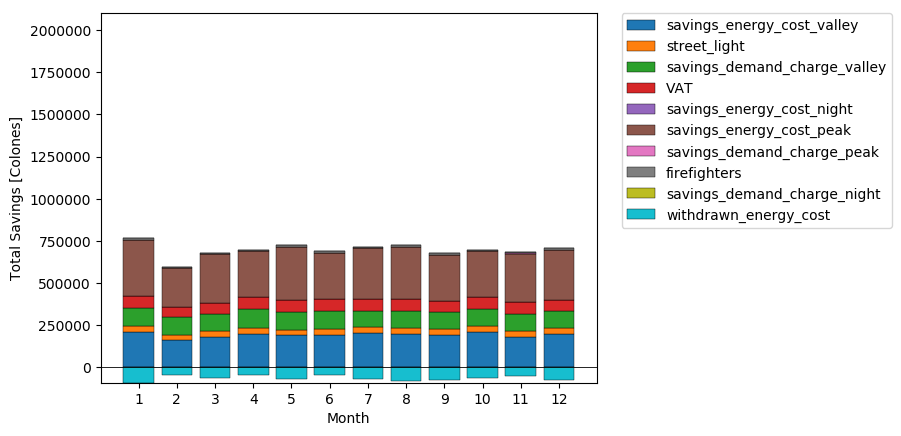

PyObject <matplotlib.lines.Line2D object at 0x14306add8>

In [183]:
plot_savings(bills_TMT,2)

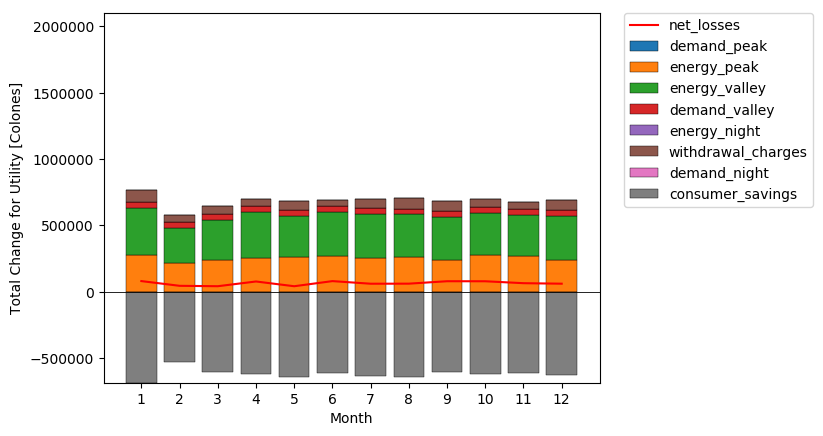

In [184]:
plot_utility_change(bills_TMT,2);

## TMT Case 3: Large PV System

In [185]:
PVTMT.capacity = 150
ts=simulate(mediumvoltage, PVTMT, 3);

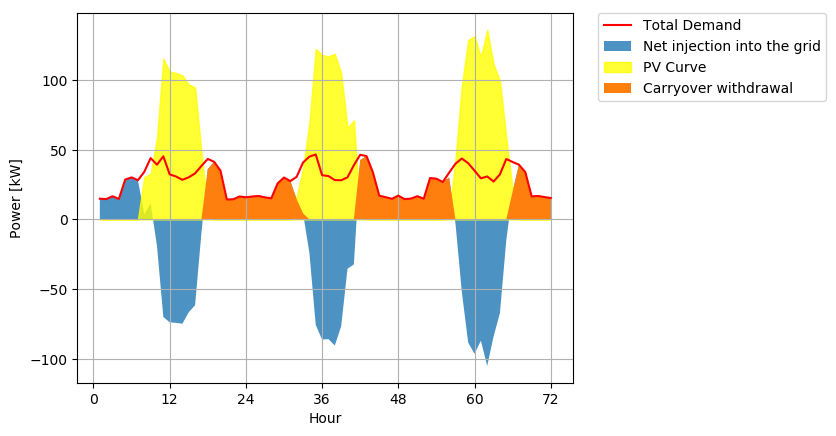

In [186]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [187]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.98 7684.18 5787.99  | 29547.62 18562.2 14478.34 10084.71  | 3420.1 876.63 5787.99  | 29547.62 10084.71 4393.62  | 46.58 46.51 35.39  | 46.53 30.79 35.39 
2 | 6969.61 7077.97 5274.38  | 19731.53 10717.32 14062.07 10307.74  | 3620.9 1412.46 5274.38  | 49279.15 20392.46 3754.33  | 47.38 47.31 36.4  | 46.98 31.42 36.4 
3 | 7574.08 7703.2 5779.08  | 23604.25 13149.49 15320.41 10601.61  | 3941.28 881.24 5779.08  | 72883.4 30994.06 4718.8  | 46.41 46.6 35.91  | 46.41 30.95 35.91 
4 | 7869.77 7933.87 5985.88  | 26959.96 15303.17 17929.18 10132.73  | 2881.06 1265.8 5985.88  | 99843.36 41126.8 7796.45  | 49.85 49.32 38.31  | 49.77 33.

In [188]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 0.0 113386.67  | 212081.5  | 413481.83 209086.46 113386.67  | 443995.71 209049.9 152566.55  | 444504.36 315790.79 152566.55  | 632661.29 
0.0 0.0 17253.97  | 216771.88  | 379286.36 192591.48 103325.03  | 448295.68 213325.65 156909.15  | 452128.42 321263.82 156909.15  | 666147.64 
0.0 0.0 39664.95  | 222951.76  | 412181.58 209603.99 113212.24  | 442917.97 210177.87 154777.29  | 442917.97 316424.16 154777.29  | 700671.14 
0.0 0.0 24821.97  | 213091.37  | 428273.14 215880.58 117263.34  | 474930.97 224818.78 165150.06  | 475698.1 334864.66 165150.06  | 768793.77 
0.0 0.0 0.0  | 206359.84  | 413033.15 209400.25 1

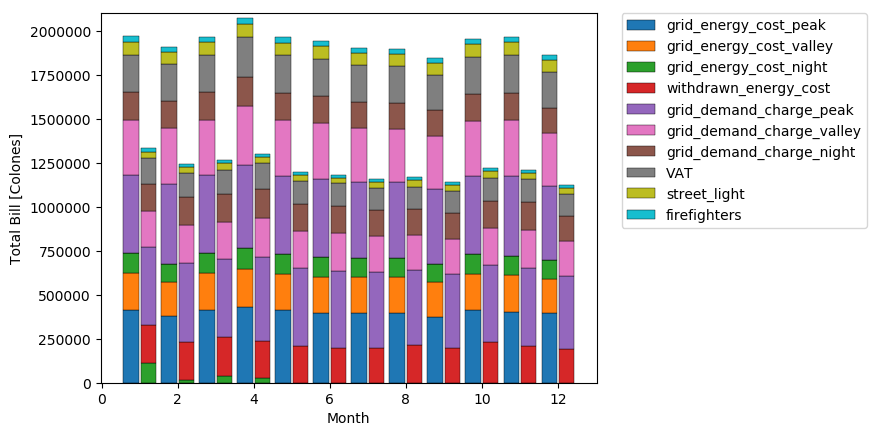

In [189]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

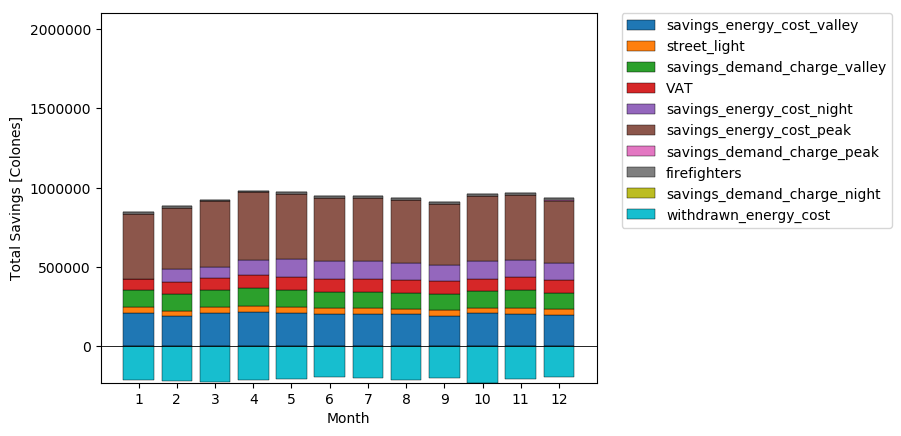

PyObject <matplotlib.lines.Line2D object at 0x1441d9f28>

In [192]:
plot_savings(bills_TMT,2)

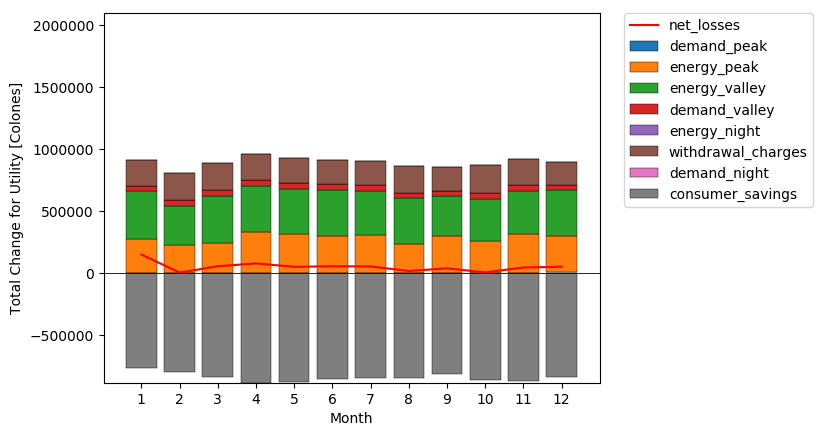

In [193]:
plot_utility_change(bills_TMT,2);